In [4]:
import pandas as pd
import numpy as np
#from rdkit import Chem
#from rdkit.Chem import AllChem
#from rdkit.Chem import Descriptors
#from rdkit.Chem import Draw
#from rdkit import DataStructs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import plotly.graph_objects as go
import itertools

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import matthews_corrcoef
import math

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

from itertools import combinations
import scipy.stats


ModuleNotFoundError: No module named 'plotly'

In [3]:
#Import aggregated & normalised data
df_toxcast = pd.read_csv('/Users/Allen/Desktop/Dissertation/Moritz_notebook/Toxcast_aggregated.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Allen/Desktop/Dissertation/Moritz_notebook/Toxcast_aggregated.csv'

## Creating a random small dataframe to test my code on before running it on the large toxcast data

In [3]:
data = {'a':[0,np.nan,0,np.nan,1,0,1],
        'b':[np.nan,0,1,0,np.nan,np.nan,1],
        'c':[1,np.nan,0,np.nan,np.nan,np.nan,1],
        'd':[1,0,1,1,0,0,0],
        'e':[np.nan,0,1,0,np.nan,np.nan,1],
        'f':['chemical_1','chemical_2','chemical_3','chemical_4','chemical_5','chemical_6','chemical_7']}
df_data = pd.DataFrame(data)

In [4]:
df_data.head()
df_data.columns[2]

'c'

In [5]:
#Testing the code on a randomly made dataframe for chemicals with label for each assay


for i in range(df_data.shape[0]): #iterate over rows
    for j in range(df_data.shape[1]-1): #iterate over columns 
        if np.isnan(df_data.iloc[i,j]) == True: #Check if missing value here, if so then brak loop
            break
        elif j+1 == df_data.shape[1]-1:
            print(df_data.iloc[i,j+1])
        else:                      #if not NaN then 
            continue

#Testing the code on a randomly made dataframe for assay with label for each chemical


for i in range(df_data.shape[1]-1): #iterate over columns
    
    for j in range(df_data.shape[0]): #iterate over rows
        if np.isnan(df_data.iloc[j,i]) == True: #Check if missing value here, if so then brak loop
            break
        elif j == df_data.shape[1]:
            print(df_data.columns[i])
        else:
            continue

        

chemical_3
chemical_7
d


# Testing on the Toxcast data

In [6]:
#Running code on toxcast dataframe for chemical with label for each assay

for i in range(df_toxcast.shape[0]): #iterate over rows
    for j in range(df_toxcast.shape[1]-1): #iterate over columns 
        if np.isnan(df_toxcast.iloc[i,j]) == True: #Check if missing value here, if so then brak loop
            break
        elif j+1 == df_toxcast.shape[1]-1:
            print(df_toxcast.iloc[i,j+1])
        else:                      #if not NaN then 
            continue

In [7]:
#Running code on toxcast dataframe for assay with label for each chemical

for i in range(df_toxcast.shape[1]-1): #iterate over columns
    
    for j in range(df_toxcast.shape[0]): #iterate over rows
        if np.isnan(df_toxcast.iloc[j,i]) == True: #Check if missing value here, if so then brak loop
            break
        elif j == df_toxcast.shape[1]:
            print(df_toxcast.columns[i])
        else:
            continue



## Result

There are no chemicals with a label for each assay, and also no assays with a label for each chemical (i.e. in the opposide dimention)



# Proportion of activites/inactivities for each assay

### Just having a play about with a smaller dataset I have created

In [8]:
list1 = np.array(([1,0,np.nan,0,1],
                [0,1,1,0,np.nan],
                [0,np.nan,np.nan,np.nan,1],
                [0,1,0,1,0]))

list1 = pd.DataFrame(list1)
stats1 = np.zeros((list1.shape[1]-1,4))

for i in range(list1.shape[1]-1): #iterate over columns
    print(i)
    
    for j in range(list1.shape[0]): #iterate over rows
        
        if np.isnan(list1.iloc[j,i]) == True: #update numpy array
                stats1[i,3] += 1
                
        elif list1.iloc[j,i] == 0.0:
            stats1[i,2] += 1
        
        elif list1.iloc[j,i] == 1.0:
            stats1[i,1] += 1
        else:
            continue
            
print(stats1)

0
1
2
3
[[0. 1. 3. 0.]
 [0. 2. 1. 1.]
 [0. 1. 1. 2.]
 [0. 1. 2. 1.]]


# Working on the toxcast data

In [9]:
#Initialise the array

stats = np.zeros((df_toxcast.shape[1]-1,4))

In [10]:
#Running code on toxcast dataframe for assay with label for each chemical

for i in range(df_toxcast.shape[1]-1): #iterate over columns
    #print(i) # Just to see the progress of the loop
    
    for j in range(df_toxcast.shape[0]): #iterate over rows
        
        if np.isnan(df_toxcast.iloc[j,i]): #update numpy array
                stats[i,3] += 1
                
        elif df_toxcast.iloc[j,i] == 0.0:
            stats[i,2] += 1
        
        elif df_toxcast.iloc[j,i] == 1.0:
            stats[i,1] += 1
        else:
            print(i,j) #Locate any errors if they arise

In [11]:
df_stats = pd.DataFrame(stats)

In [12]:
for i in range(df_toxcast.shape[1]-1):
    df_stats.iloc[i,0] = df_toxcast.columns[i]

In [13]:
df_stats.columns = ['assay_name','active_compounds','inactive_compounds','missing_compounds']

In [14]:
total = df_stats['active_compounds']+df_stats['inactive_compounds']+df_stats['missing_compounds']
df_stats['total'] = total

In [15]:
df_stats

,assay_name,active_compounds,inactive_compounds,missing_compounds,total
0,ACEA_T47D_80hr_Negative,424.0,1233.0,6130.0,7787.0
1,ACEA_T47D_80hr_Positive,279.0,1374.0,6134.0,7787.0
2,APR_HepG2_CellCycleArrest_24h_dn,167.0,834.0,6786.0,7787.0
3,APR_HepG2_CellCycleArrest_24h_up,43.0,959.0,6785.0,7787.0
4,APR_HepG2_CellCycleArrest_72h_dn,232.0,766.0,6789.0,7787.0
...,...,...,...,...,...
612,Tanguay_ZF_120hpf_SOMI_up,38.0,953.0,6796.0,7787.0
613,Tanguay_ZF_120hpf_SWIM_up,32.0,958.0,6797.0,7787.0
614,Tanguay_ZF_120hpf_TRUN_up,56.0,934.0,6797.0,7787.0
615,Tanguay_ZF_120hpf_TR_up,80.0,911.0,6796.0,7787.0


In [16]:

fraction_active = df_stats['active_compounds']/df_stats['total']
df_stats['fraction_active'] = fraction_active

fraction_inactive = df_stats['inactive_compounds']/df_stats['total']
df_stats['fraction_inactive'] = fraction_inactive

fraction_missing = df_stats['missing_compounds']/df_stats['total']
df_stats['fraction_missing'] = fraction_missing

df_stats

,assay_name,active_compounds,inactive_compounds,missing_compounds,total,fraction_active,fraction_inactive,fraction_missing
0,ACEA_T47D_80hr_Negative,424.0,1233.0,6130.0,7787.0,0.054450,0.158341,0.787209
1,ACEA_T47D_80hr_Positive,279.0,1374.0,6134.0,7787.0,0.035829,0.176448,0.787723
2,APR_HepG2_CellCycleArrest_24h_dn,167.0,834.0,6786.0,7787.0,0.021446,0.107102,0.871452
3,APR_HepG2_CellCycleArrest_24h_up,43.0,959.0,6785.0,7787.0,0.005522,0.123154,0.871324
4,APR_HepG2_CellCycleArrest_72h_dn,232.0,766.0,6789.0,7787.0,0.029793,0.098369,0.871838
...,...,...,...,...,...,...,...,...
612,Tanguay_ZF_120hpf_SOMI_up,38.0,953.0,6796.0,7787.0,0.004880,0.122383,0.872737
613,Tanguay_ZF_120hpf_SWIM_up,32.0,958.0,6797.0,7787.0,0.004109,0.123026,0.872865
614,Tanguay_ZF_120hpf_TRUN_up,56.0,934.0,6797.0,7787.0,0.007191,0.119943,0.872865
615,Tanguay_ZF_120hpf_TR_up,80.0,911.0,6796.0,7787.0,0.010274,0.116990,0.872737


In [17]:
df_stats.to_csv('/Users/Allen/Desktop/Dissertation/Moritz_notebook/assay_stats.csv')

## Run this to save having to run loops again

In [83]:
df_stats = pd.read_csv('/Users/Allen/Desktop/Dissertation/Moritz_notebook/assay_stats.csv')


# Chemical descriptor (eg molecular weight)

In [19]:
#Molecular weight for each compound

df_chemical_descriptor = pd.DataFrame(df_toxcast.iloc[:,df_toxcast.shape[1]-1])

In [20]:
mols = [Chem.MolFromSmiles(smi) for smi in df_chemical_descriptor['standardised_smiles']]
weights = [Descriptors.ExactMolWt(mol) for mol in mols]

df_chemical_descriptor['weights']=pd.DataFrame(weights)

In [21]:
df_chemical_descriptor.to_csv('/Users/Allen/Desktop/Dissertation/Moritz_notebook/chemical_descriptor.csv')

268.7555332766991
234.161979944


[]

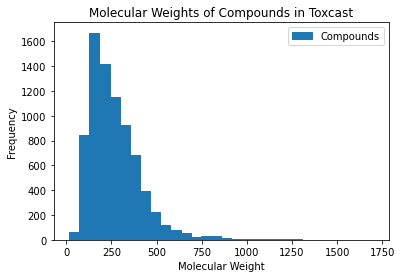

In [74]:
print(df_chemical_descriptor['weights'].mean())
print(df_chemical_descriptor['weights'].median())
plt.hist(df_chemical_descriptor['weights'], bins=30, label = 'Compounds', edgecolor = '#1f77b4')
plt.title('Molecular Weights of Compounds in Toxcast')
plt.xlabel('Molecular Weight')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('/Users/Allen/Desktop/Dissertation/Moritz_notebook/Exploration/weights.pdf')
plt.plot()

## Run this to save having to run loops again

In [49]:
df_chemical_descriptor = pd.read_csv('/Users/Allen/Desktop/Dissertation/Moritz_notebook/chemical_descriptor.csv')

# Attempt to filter the assays down

### Assay correlation

In [84]:
'''
Credit: Moritz Walter

'''

#This funtion returns the contingency table between assay1 and assay2


def cont_table_assays(assay1,assay2):
    #get contigengency table that describes actives in assay1 and assay2
    #considers only substances measured in both assays
    #return 2x2 contingengy table: (0,0)/a: A+B+, (0,1)/b: A+B-, (1,0)/c: A-B+, (1,1)/d: A-B-
    
    a = 0
    b = 0
    c = 0
    d = 0
    
    for ass1,ass2 in zip(assay1,assay2):
        
        if math.isnan(ass1) or math.isnan(ass2): #consider only cases where compound was measured in both assyas
            continue
        
        if ass1 == 1 and ass2 == 1:
            a+=1
        
        elif ass1 == 1 and ass2 == 0:
            b+=1
        
        elif ass1 == 0 and ass2 == 1:
            c+=1
        
        elif ass1 == 0 and ass2 == 0:
            d+=1
            
    return(np.array([[a,b],[c,d]])) 



#This function uses the contingency table to compute information metrics

def info_metrics(array):
    a = array[0,0]
    b = array[0,1]
    c = array[1,0]
    d = array[1,1]
    
    #prob active in assay1
    p1 = (a+b)/(a+b+c+d)
    #entropy assay1
    h1 = -p1*np.log2(p1) - (1-p1)*np.log2(1-p1)
    
    #prob active in assay2
    p2 = (a+c)/(a+b+c+d)
    #entropy assay2
    h2 = -p2*np.log2(p2) - (1-p2)*np.log2(1-p2)
    
    #prob each table field
    p3 = a/(a+b+c+d)
    p4 = b/(a+b+c+d)
    p5 = c/(a+b+c+d)
    p6 = d/(a+b+c+d)
    
    #joint entropy
    h12 = -p3*np.log2(p3) - p4*np.log2(p4) - p5*np.log2(p5) - p6*np.log2(p6)
    
    #mutual information
    mi = h1 + h2 - h12
    
    return(h1,h2,h12,mi)

In [89]:
# Combining these two so the only output is the metric

from math import isnan
from numpy import log2

def metric_of_two(assay1,assay2):
    #get contigengency table that describes actives in assay1 and assay2
    #considers only substances measured in both assays
    #return 2x2 contingengy table: (0,0)/a: A+B+, (0,1)/b: A+B-, (1,0)/c: A-B+, (1,1)/d: A-B-
    
    a = 0
    b = 0
    c = 0
    d = 0
    
    for ass1,ass2 in zip(assay1,assay2):
        
        if isnan(ass1) or isnan(ass2): #consider only cases where compound was measured in both assyas
            continue
        
        if ass1 == 1 and ass2 == 1:
            a+=1
        
        elif ass1 == 1 and ass2 == 0:
            b+=1
        
        elif ass1 == 0 and ass2 == 1:
            c+=1
        
        elif ass1 == 0 and ass2 == 0:
            d+=1
    
    #prob active in assay1
    p1 = (a+b)/(a+b+c+d)
    #entropy assay1
    h1 = -p1*log2(p1) - (1-p1)*log2(1-p1)
    
    #prob active in assay2
    p2 = (a+c)/(a+b+c+d)
    #entropy assay2
    h2 = -p2*log2(p2) - (1-p2)*log2(1-p2)
    
    #prob each table field
    p3 = a/(a+b+c+d)
    p4 = b/(a+b+c+d)
    p5 = c/(a+b+c+d)
    p6 = d/(a+b+c+d)
    
    #joint entropy
    h12 = -p3*log2(p3) - p4*log2(p4) - p5*log2(p5) - p6*log2(p6)
    
    #mutual information
    mi = h1 + h2 - h12
    
    return(h12,mi)

In [27]:
#Creating lost of combinations
from itertools import combinations


header_list = list(df_toxcast.columns)
del header_list[-1] #delete the smiles heading
header_combinations = []

for combo in combinations(header_list, 2):  # 2 for pairs, 3 for triplets, etc
    header_combinations.append(combo)

header_combinations = np.array(header_combinations)

In [28]:
information_table = np.zeros([len(header_combinations), 2])

for i in range(len(header_combinations)): #iterate over combinations
        
    try:
        information_table[i,0], information_table[i,1] = metric_of_two(df_toxcast[header_combinations[i,0]],df_toxcast[header_combinations[i,1]])
    except ZeroDivisionError:
        information_table[i,0], information_table[i,1] = np.nan, np.nan
        print('error')



<ipython-input-23-bc71eca6ccaf>:41: RuntimeWarning: divide by zero encountered in log2
  h2 = -p2*log2(p2) - (1-p2)*log2(1-p2)
<ipython-input-23-bc71eca6ccaf>:41: RuntimeWarning: invalid value encountered in double_scalars
  h2 = -p2*log2(p2) - (1-p2)*log2(1-p2)
<ipython-input-23-bc71eca6ccaf>:50: RuntimeWarning: divide by zero encountered in log2
  h12 = -p3*log2(p3) - p4*log2(p4) - p5*log2(p5) - p6*log2(p6)
<ipython-input-23-bc71eca6ccaf>:50: RuntimeWarning: invalid value encountered in double_scalars
  h12 = -p3*log2(p3) - p4*log2(p4) - p5*log2(p5) - p6*log2(p6)
<ipython-input-23-bc71eca6ccaf>:36: RuntimeWarning: divide by zero encountered in log2
  h1 = -p1*log2(p1) - (1-p1)*log2(1-p1)
<ipython-input-23-bc71eca6ccaf>:36: RuntimeWarning: invalid value encountered in double_scalars
  h1 = -p1*log2(p1) - (1-p1)*log2(1-p1)


error
error
error
error
error


In [29]:
#creating the dataframe including all the data

df_relations = pd.DataFrame({'assay1' : header_combinations[:,0],
                           'assay2': header_combinations[:,1],
                           'joint_entropy' : information_table[:,0],
                           'mutual_information' : information_table[:,1]})


In [271]:
df_relations.to_csv('/Users/Allen/Desktop/Dissertation/Moritz_notebook/assay_information.csv')

In [85]:
df_relations = pd.read_csv('/Users/Allen/Desktop/Dissertation/Moritz_notebook/assay_information.csv')
df_relations

,Unnamed: 0,assay1,assay2,joint_entropy,mutual_information
0,0,ACEA_T47D_80hr_Negative,ACEA_T47D_80hr_Positive,1.475818,0.000064
1,1,ACEA_T47D_80hr_Negative,APR_HepG2_CellCycleArrest_24h_dn,1.431312,0.082837
2,2,ACEA_T47D_80hr_Negative,APR_HepG2_CellCycleArrest_24h_up,1.113677,0.001906
3,3,ACEA_T47D_80hr_Negative,APR_HepG2_CellCycleArrest_72h_dn,1.546391,0.104440
4,4,ACEA_T47D_80hr_Negative,APR_HepG2_CellLoss_24h_dn,1.498221,0.230013
...,...,...,...,...,...
190031,190031,Tanguay_ZF_120hpf_SWIM_up,Tanguay_ZF_120hpf_TR_up,0.531157,0.079776
190032,190032,Tanguay_ZF_120hpf_SWIM_up,Tanguay_ZF_120hpf_YSE_up,0.657201,0.092984
190033,190033,Tanguay_ZF_120hpf_TRUN_up,Tanguay_ZF_120hpf_TR_up,0.586466,0.128660
190034,190034,Tanguay_ZF_120hpf_TRUN_up,Tanguay_ZF_120hpf_YSE_up,0.739977,0.115701


# Old code

information_table = np.zeros([(df_toxcast.shape[1]-1)**2, 4])

for i in range(df_toxcast.shape[1]-1): #iterate over columns
    
    for j in range(df_toxcast.shape[1]-1):
        
        try:
            information_table[j + (i*(df_toxcast.shape[1]-1)),0], information_table[j + (i*(df_toxcast.shape[1]-1)),1]
            information_table[j + (i*(df_toxcast.shape[1]-1)),2], information_table[j + (i*(df_toxcast.shape[1]-1)),3] = metric_of_two(df_toxcast.iloc[:,i],df_toxcast.iloc[:,j])
        except ZeroDivisionError:
            information_table[j,0], information_table[j,1] = np.nan, np.nan
            print('error')
    print(i)

assay_1 = []
assay_2 = []

for i in range(df_toxcast.shape[1]-1): #iterate over columns
    
    for j in range(df_toxcast.shape[1]-1):
        
        assay_1.append(df_toxcast.columns[i])
        assay_2.append(df_toxcast.columns[j])
        

# Histograms 

0.02633775976759202
0.00609706566787885


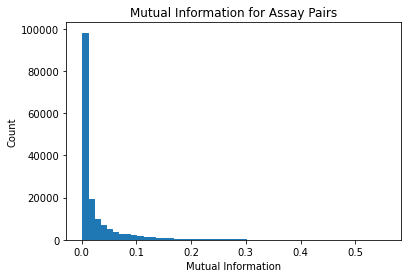

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

#Mutual information and joint entropy histograms 



plt.hist(df_relations['mutual_information'], bins=50, label = 'Mutual Information', edgecolor = '#1f77b4')
plt.title('Mutual Information for Assay Pairs')
plt.xlabel('Mutual Information')
plt.ylabel('Count')
plt.savefig('/Users/Allen/Desktop/Dissertation/Moritz_notebook/Exploration/mutual_info.pdf')
plt.plot()

print(df_relations['mutual_information'].mean())
print(df_relations['mutual_information'].median())

1.1324156709294269
1.1350862833434103


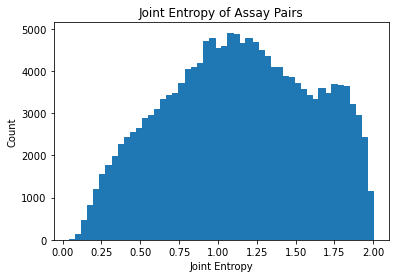

In [72]:
plt.hist(df_relations['joint_entropy'], bins=50, edgecolor = '#1f77b4')
plt.title('Joint Entropy of Assay Pairs')
plt.xlabel('Joint Entropy')
plt.ylabel('Count')
plt.savefig('/Users/Allen/Desktop/Dissertation/Moritz_notebook/Exploration/joint_entropy.pdf')
plt.plot()

print(df_relations['joint_entropy'].mean())
print(df_relations['joint_entropy'].median())

0.7020444455174949
0.8204700141261076


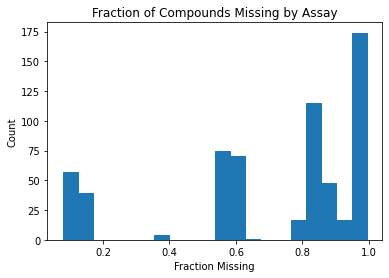

In [71]:
plt.hist(df_stats['fraction_missing'], bins=20, edgecolor = '#1f77b4')
plt.title('Fraction of Compounds Missing by Assay')
plt.xlabel('Fraction Missing')
plt.ylabel('Count')
plt.savefig('/Users/Allen/Desktop/Dissertation/Moritz_notebook/Exploration/fraction_missing.pdf')
plt.plot()

print(df_stats['fraction_missing'].mean())
print(df_stats['fraction_missing'].median())

0.024186094140610397
0.0130987543341466


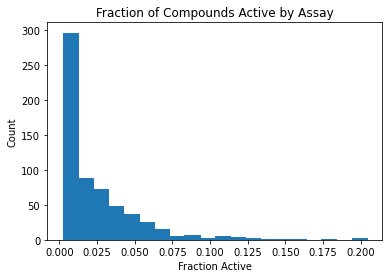

In [70]:
plt.hist(df_stats['fraction_active'], bins=20, edgecolor = '#1f77b4')
plt.title('Fraction of Compounds Active by Assay')
plt.xlabel('Fraction Active')
plt.ylabel('Count')
plt.savefig('/Users/Allen/Desktop/Dissertation/Moritz_notebook/Exploration/fraction_active.pdf')
plt.plot()

print(df_stats['fraction_active'].mean())
print(df_stats['fraction_active'].median())

## Other Histograms

[]

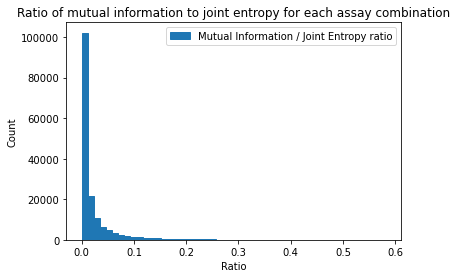

In [69]:
# Ratio of mutual information and joint entropy
plt.hist(df_relations['mutual_information']/df_relations['joint_entropy'], bins=50, label = 'Mutual Information / Joint Entropy ratio',edgecolor = '#1f77b4')
plt.xlabel('Ratio')
plt.title('Ratio of mutual information to joint entropy for each assay combination')
plt.ylabel('Count')
plt.legend()
plt.savefig('/Users/Allen/Desktop/Dissertation/Moritz_notebook/Exploration/ratio_graph.pdf')
plt.plot()

In [62]:
new_data = (df_relations['mutual_information']/df_relations['joint_entropy']).copy()

print(new_data.mean())
print(new_data.max())

0.021513252394036196
0.5823902977233172


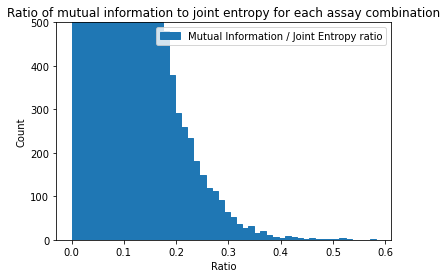

In [68]:
plt.hist(df_relations['mutual_information']/df_relations['joint_entropy'], bins=50, label = 'Mutual Information / Joint Entropy ratio', edgecolor = '#1f77b4')
plt.xlabel('Ratio')
plt.title('Ratio of mutual information to joint entropy for each assay combination')
plt.ylabel('Count')
plt.ylim(0,500)
plt.legend()
plt.savefig('/Users/Allen/Desktop/Dissertation/Moritz_notebook/Exploration/ratio_graph_ylim.pdf')


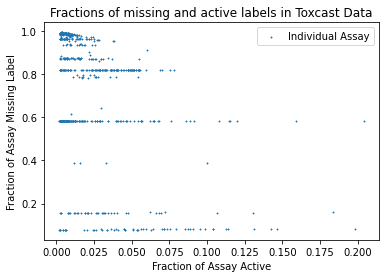

In [65]:
# 2D scatter plot of fraction missing and fraction active

plt.scatter(df_stats['fraction_active'], df_stats['fraction_missing'], marker = 'x', s=0.8, label = 'Individual Assay')
plt.title('Fractions of missing and active labels in Toxcast Data')
plt.xlabel('Fraction of Assay Active')
plt.ylabel('Fraction of Assay Missing Label')
plt.legend()
plt.savefig('/Users/Allen/Desktop/Dissertation/Moritz_notebook/Exploration/fractions_missing_active.pdf')



In [54]:
new_plot.show()

AttributeError: 'PathCollection' object has no attribute 'show'

In [24]:
df_ratios = pd.DataFrame(df_relations['mutual_information']/df_relations['joint_entropy'])
df_ratios.dropna().sort_values(0,ascending=False).reset_index()

,index,0
0,184885,5.823903e-01
1,189975,5.330687e-01
2,166172,5.208551e-01
3,184888,5.176362e-01
4,131057,5.127045e-01
...,...,...
162355,148539,-2.739646e-16
162356,19955,-3.071919e-16
162357,20022,-3.071919e-16
162358,142368,-3.228142e-16


# Creating Function to obtain mutual info and entropy

In [86]:


def info_table(df, extra = False):



    header_list = list(df.columns)
    del header_list[-1] #delete the smiles heading
    if extra == True:
        del header_list[-1]
    else: pass
    header_combinations = []

    for combo in combinations(header_list, 2):  # 2 for pairs, 3 for triplets, etc
        header_combinations.append(combo)

    header_combinations = np.array(header_combinations)



    information_table = np.zeros([len(header_combinations), 2])

    for i in range(len(header_combinations)): #iterate over combinations

        try:
            information_table[i,0], information_table[i,1] = metric_of_two(df[header_combinations[i,0]],df[header_combinations[i,1]])
        except ZeroDivisionError:
            information_table[i,0], information_table[i,1] = np.nan, np.nan
            print('error')





    df_relations = pd.DataFrame({'assay1' : header_combinations[:,0],
                               'assay2': header_combinations[:,1],
                               'joint_entropy' : information_table[:,0],
                               'mutual_information' : information_table[:,1]})

    return(df_relations)



In [91]:
#Moritz notebook

df_ames = pd.read_csv('/Users/Allen/Desktop/Dissertation/Moritz_notebook/Ames_aggregated.csv')

df_tox21 = pd.read_csv('/Users/Allen/Desktop/Dissertation/Moritz_notebook/Tox21_aggregated.csv')

In [92]:
ames_relations = info_table(df_ames, True)
tox21_relations = info_table(df_tox21, True)

[]

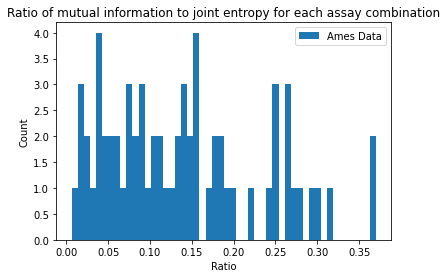

In [93]:
ames_relations
# Ratio of mutual information and joint entropy
plt.hist(ames_relations['mutual_information']/ames_relations['joint_entropy'], bins=50, label = 'Ames Data')
plt.xlabel('Ratio')
plt.title('Ratio of mutual information to joint entropy for each assay combination')
plt.ylabel('Count')
plt.legend()
plt.savefig('/Users/Allen/Desktop/Dissertation/Moritz_notebook/Exploration/ames_ratio_graph.pdf')
plt.plot()

[]

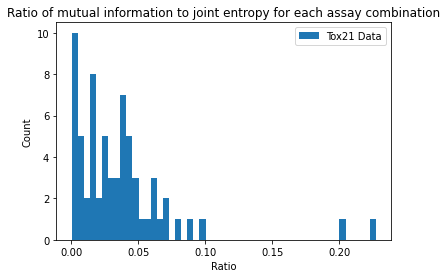

In [94]:
tox21_relations

# Ratio of mutual information and joint entropy
plt.hist(tox21_relations['mutual_information']/tox21_relations['joint_entropy'], bins=50, label = 'Tox21 Data')
plt.xlabel('Ratio')
plt.title('Ratio of mutual information to joint entropy for each assay combination')
plt.ylabel('Count')
plt.legend()
plt.savefig('/Users/Allen/Desktop/Dissertation/Moritz_notebook/Exploration/tox21_ratio_graph.pdf')
plt.plot()

# Stats table

In [95]:
def stats(df,x=1):



    stats = np.zeros((df.shape[1]-x,4))




    for i in range(df.shape[1]-x): #iterate over columns
        #print(i) # Just to see the progress of the loop

        for j in range(df.shape[0]): #iterate over rows

            if np.isnan(df.iloc[j,i]): #update numpy array
                    stats[i,3] += 1

            elif df.iloc[j,i] == 0.0:
                stats[i,2] += 1

            elif df.iloc[j,i] == 1.0:
                stats[i,1] += 1
            else:
                print(i,j) #Locate any errors if they arise


    df_stats = pd.DataFrame(stats)


    for i in range(df.shape[1]-x):
        df_stats.iloc[i,0] = df.columns[i]


    df_stats.columns = ['assay_name','active_compounds','inactive_compounds','missing_compounds']



    total = df_stats['active_compounds']+df_stats['inactive_compounds']+df_stats['missing_compounds']
    df_stats['total'] = total




    fraction_active = df_stats['active_compounds']/df_stats['total']
    df_stats['fraction_active'] = fraction_active

    fraction_inactive = df_stats['inactive_compounds']/df_stats['total']
    df_stats['fraction_inactive'] = fraction_inactive

    fraction_missing = df_stats['missing_compounds']/df_stats['total']
    df_stats['fraction_missing'] = fraction_missing
    
    return(df_stats)

In [96]:
df_ames_stats = stats(df_ames,2)
df_tox21_stats = stats(df_tox21,2)

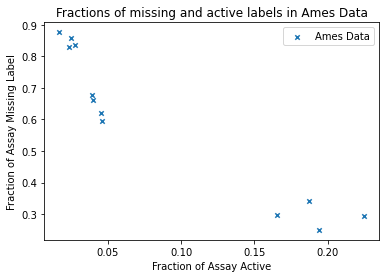

In [127]:
plt.scatter(df_ames_stats['fraction_active'], df_ames_stats['fraction_missing'], marker = 'x', s=20, label = 'Ames Data')
plt.title('Fractions of missing and active labels in Ames Data')
plt.xlabel('Fraction of Assay Active')
plt.ylabel('Fraction of Assay Missing Label')
plt.savefig('/Users/Allen/Desktop/Dissertation/Moritz_notebook/Exploration/ames_fractions_missing_active.pdf')
plt.legend()

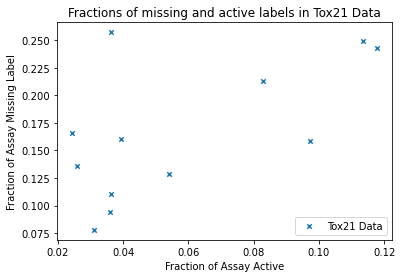

In [126]:
plt.scatter(df_tox21_stats['fraction_active'], df_tox21_stats['fraction_missing'], marker = 'x', s=20, label = 'Tox21 Data')
plt.title('Fractions of missing and active labels in Tox21 Data')
plt.xlabel('Fraction of Assay Active')
plt.ylabel('Fraction of Assay Missing Label')
plt.savefig('/Users/Allen/Desktop/Dissertation/Moritz_notebook/Exploration/tox21_fractions_missing_active.pdf')
plt.legend()

# Creating a comparison

In [ ]:
fig, axs = plt.subplots(2, 3)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

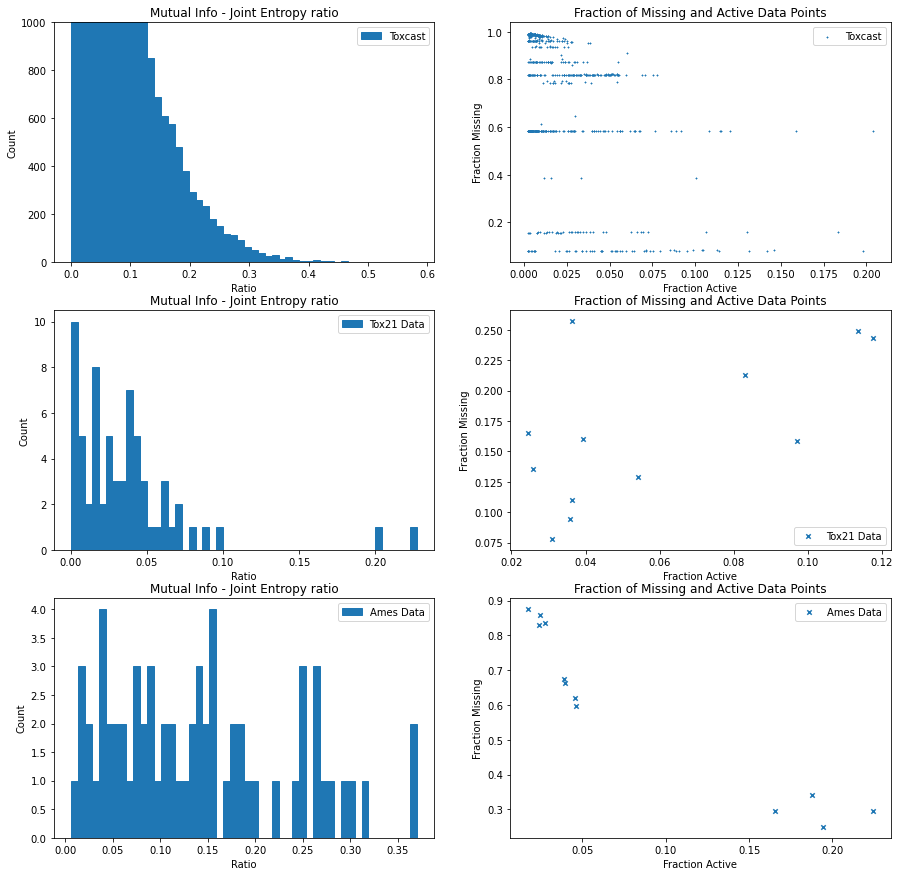

In [97]:
fig, axs = plt.subplots(3, 2, figsize=(15,15))
axs[0,0].hist(df_relations['mutual_information']/df_relations['joint_entropy'], bins=50, label = 'Toxcast', edgecolor = '#1f77b4')
axs[0,0].set_ylim(0,1000)
axs[0,0].set_title('Mutual Info - Joint Entropy ratio')
axs[0,0].set_ylabel('Count')
axs[0,0].set_xlabel('Ratio')
axs[0,0].legend()

axs[2,0].hist(ames_relations['mutual_information']/ames_relations['joint_entropy'], bins=50, label = 'Ames Data', edgecolor = '#1f77b4')
axs[2,0].set_title('Mutual Info - Joint Entropy ratio')
axs[2,0].set_ylabel('Count')
axs[2,0].set_xlabel('Ratio')
axs[2,0].legend()

axs[1,0].hist(tox21_relations['mutual_information']/tox21_relations['joint_entropy'], bins=50, label = 'Tox21 Data', edgecolor = '#1f77b4')
axs[1,0].set_title('Mutual Info - Joint Entropy ratio')
axs[1,0].set_ylabel('Count')
axs[1,0].set_xlabel('Ratio')
axs[1,0].legend()

axs[0,1].scatter(df_stats['fraction_active'], df_stats['fraction_missing'], marker = 'x', s=0.8, label = 'Toxcast')
axs[0,1].set_title('Fraction of Missing and Active Data Points')
axs[0,1].set_ylabel('Fraction Missing')
axs[0,1].set_xlabel('Fraction Active')
axs[0,1].legend()

axs[1,1].scatter(df_tox21_stats['fraction_active'], df_tox21_stats['fraction_missing'], marker = 'x', s=20, label = 'Tox21 Data')
axs[1,1].set_title('Fraction of Missing and Active Data Points')
axs[1,1].set_ylabel('Fraction Missing')
axs[1,1].set_xlabel('Fraction Active')
axs[1,1].legend()

axs[2,1].scatter(df_ames_stats['fraction_active'], df_ames_stats['fraction_missing'], marker = 'x', s=20, label = 'Ames Data')
axs[2,1].set_title('Fraction of Missing and Active Data Points')
axs[2,1].set_ylabel('Fraction Missing')
axs[2,1].set_xlabel('Fraction Active')
axs[2,1].legend()

plt.savefig('/Users/Allen/Desktop/Dissertation/Moritz_notebook/Exploration/dataset_comparison.pdf')

In [ ]:
#filtering based on activity and sparsity

In [214]:
df_filtered_assays = df_stats.loc[(df_stats['active_compounds'] >= 60) & (df_stats['missing_compounds'] <= 7287)]

In [216]:
df_filtered_assays

,Unnamed: 0,assay_name,active_compounds,inactive_compounds,missing_compounds,total,fraction_active,fraction_inactive,fraction_missing
0,0,ACEA_T47D_80hr_Negative,424.0,1233.0,6130.0,7787.0,0.054450,0.158341,0.787209
1,1,ACEA_T47D_80hr_Positive,279.0,1374.0,6134.0,7787.0,0.035829,0.176448,0.787723
2,2,APR_HepG2_CellCycleArrest_24h_dn,167.0,834.0,6786.0,7787.0,0.021446,0.107102,0.871452
4,4,APR_HepG2_CellCycleArrest_72h_dn,232.0,766.0,6789.0,7787.0,0.029793,0.098369,0.871838
5,5,APR_HepG2_CellLoss_24h_dn,286.0,714.0,6787.0,7787.0,0.036728,0.091691,0.871581
...,...,...,...,...,...,...,...,...,...
606,606,Tanguay_ZF_120hpf_MORT_up,118.0,884.0,6785.0,7787.0,0.015153,0.113523,0.871324
608,608,Tanguay_ZF_120hpf_PE_up,116.0,874.0,6797.0,7787.0,0.014897,0.112238,0.872865
611,611,Tanguay_ZF_120hpf_SNOU_up,107.0,882.0,6798.0,7787.0,0.013741,0.113266,0.872993
615,615,Tanguay_ZF_120hpf_TR_up,80.0,911.0,6796.0,7787.0,0.010274,0.116990,0.872737


In [195]:
#100 randomly sampled assays from the filtered 
df_sampled = df_filtered_assays.sample(100, random_state = 0)

In [197]:
df_sampled.to_csv('/Users/Allen/Desktop/Dissertation/Moritz_notebook/sampled_assays.csv')